<a href="https://colab.research.google.com/github/Kanka-goswami/IISc_CDS_2302064/blob/main/Kanka_Copy_of_M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [2]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

### Data Loading

In [3]:
# Read the hour.csv file
hour = pd.read_csv('hour.csv', index_col= 'instant')

print the first five rows of dataset

In [4]:
hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [6]:
column_dict = dict(map(lambda x: x,enumerate(hour.columns)))

# function to return key for any value

def get_column_keys(val):

    for key, value in column_dict.items():
        if val == value:
            return key

    return "key doesn't exist"

In [7]:
print(get_column_keys('hr'))

4


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

<Axes: xlabel='hr', ylabel='cnt'>

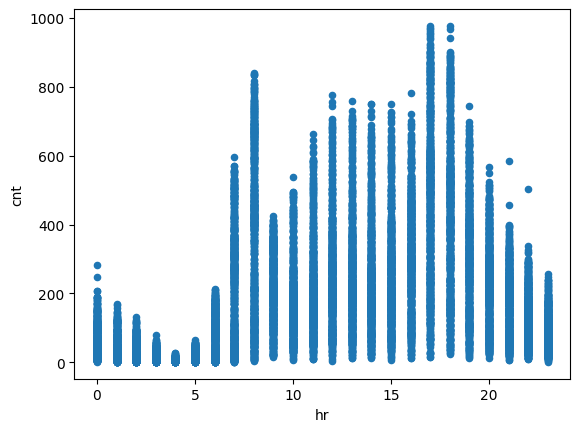

In [8]:
hour.plot(x='hr',
          y= 'cnt',
          kind= 'scatter'
          )

#### Visualize the distribution of count, casual and registered variables

array([[<Axes: title={'center': 'cnt'}>]], dtype=object)

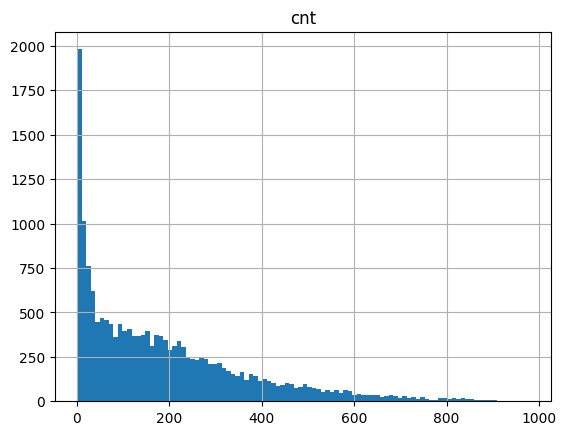

In [9]:
# distribuiton of count variable
hour.hist(column='cnt',
          bins= 100
          )

array([[<Axes: title={'center': 'casual'}>]], dtype=object)

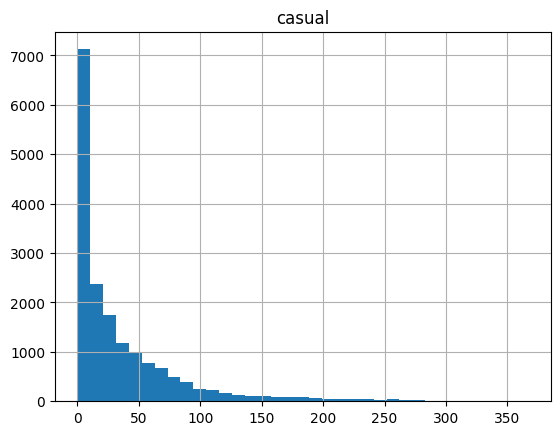

In [10]:
# distribuiton of casual variable
hour.hist(column='casual',
          bins= 35
          )

array([[<Axes: title={'center': 'registered'}>]], dtype=object)

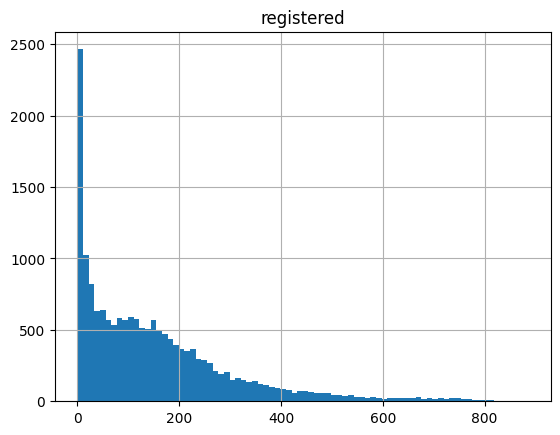

In [11]:
# distribuiton of registered variable
hour.hist(column='registered',
          bins= 80
          )

#### Describe the relation of weekday, holiday and working day

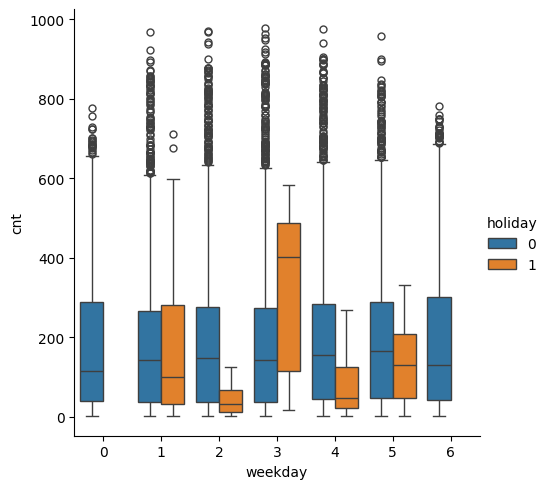

In [12]:
sns.catplot(data= hour,
            x= 'weekday',
            y= 'cnt',
            hue= 'holiday',
            kind= 'box',
            )

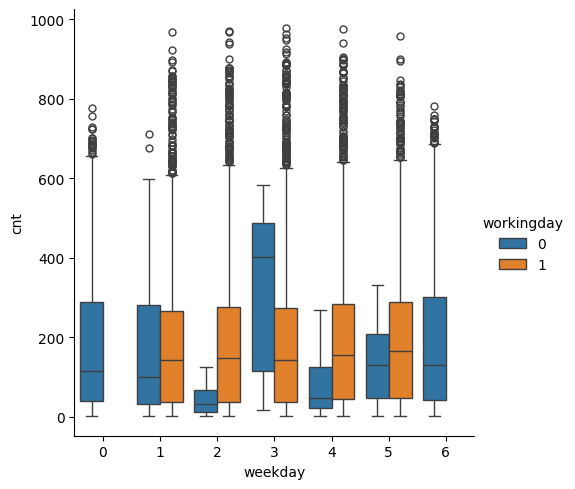

In [13]:
sns.catplot(data= hour,
            x= 'weekday',
            y= 'cnt',
            hue= 'workingday',
            kind= 'box',
            )

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

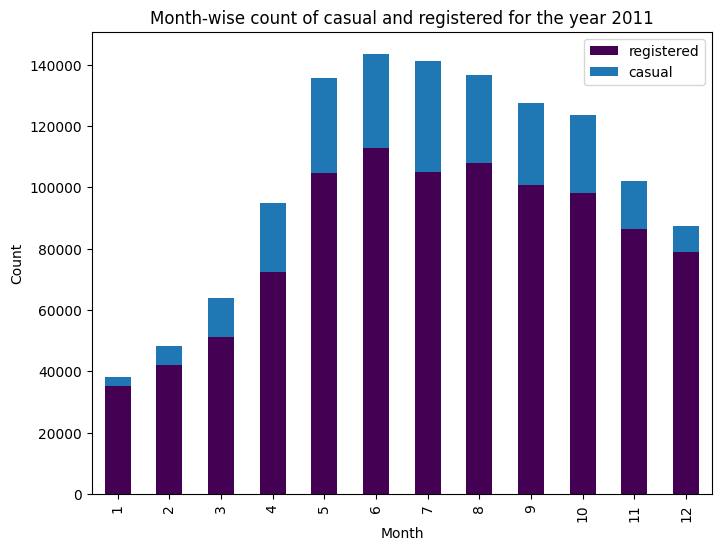

In [14]:
# stacked bar chart for year 2011
data_2011 = hour[hour["yr"] == 0]
monthly_data_2011 = data_2011.groupby("mnth")[["casual", "registered"]].sum()

monthly_data_2011["registered"].plot(kind="bar", colormap="viridis", figsize=(8,6))
monthly_data_2011["casual"].plot(kind="bar", bottom=monthly_data_2011["registered"])

plt.title("Month-wise count of casual and registered for the year 2011")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()

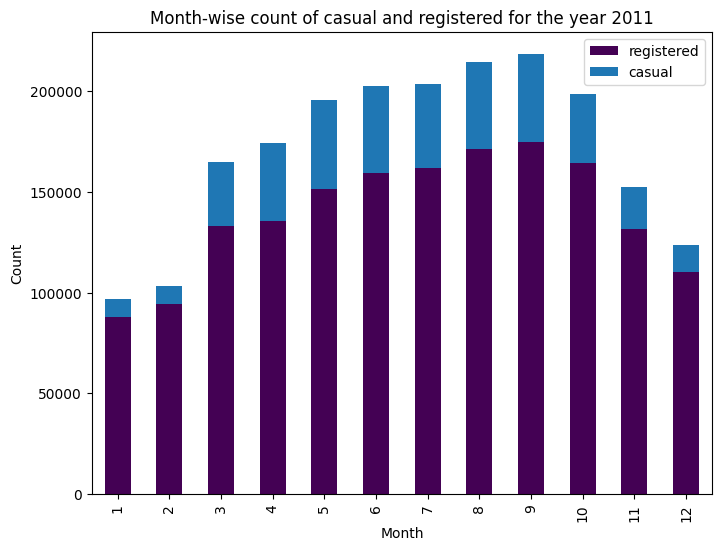

In [15]:
# stacked bar chart for year 2012
data_2011 = hour[hour["yr"] == 1]
monthly_data_2011 = data_2011.groupby("mnth")[["casual", "registered"]].sum()

monthly_data_2011["registered"].plot(kind="bar", colormap="viridis", figsize=(8,6))
monthly_data_2011["casual"].plot(kind="bar", bottom=monthly_data_2011["registered"])

plt.title("Month-wise count of casual and registered for the year 2011")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()

#### Analyze the correlation between features with heatmap

<Axes: >

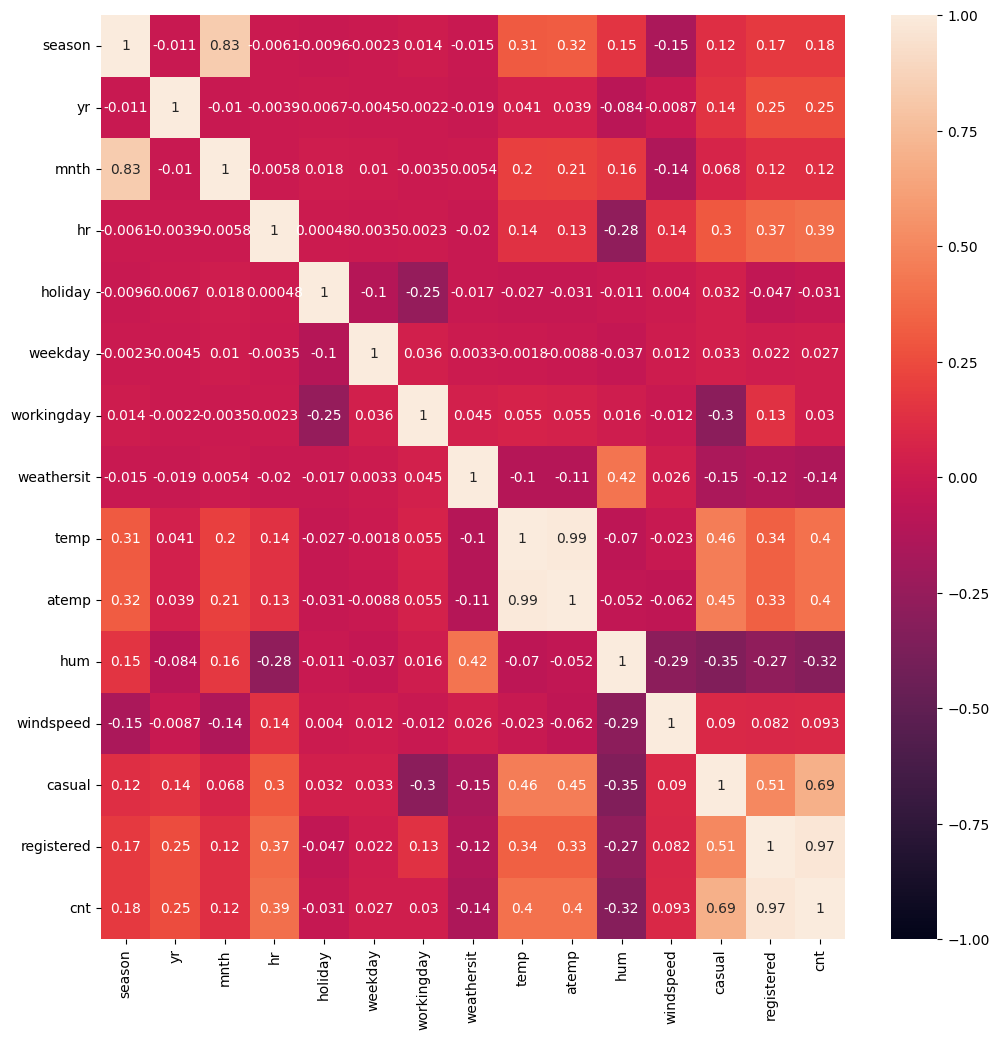

In [16]:
corr_matrix = hour.corr(method= 'pearson',
                        numeric_only= True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data= corr_matrix,
            annot= True,
            cmap= 'rocket',
            vmax= 1,
            vmin= -1,
            )

#### Visualize the box plot of casual and registered variables to check the outliers

<Axes: >

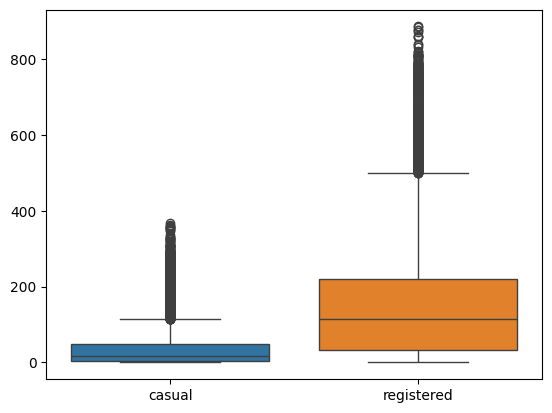

In [17]:
attributes = ['casual','registered']
sns.boxplot(data= hour[attributes])

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [18]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [19]:
df = hour.copy()
df= df.drop(columns= ['dteday'])
df.columns.tolist()

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

#### Identify categorical and continuous variables


In [20]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
cat_features = ['season',
                'yr',
                'mnth',
                'hr',
                'holiday',
                'weekday',
                'workingday',
                'weathersit'
                ]
num_features = [
                'atemp',
                'hum',
                'windspeed',
                'casual',
                'registered',
                'cnt'
                ]

### Remove outliers

Since Logistic Regression is sensitive to outliers it is important to remove outliners from the dataset.

Notebook author: Jonas Paluci Barbosa

Notebook title: Removing Outliers within a Pipeline

https://www.kaggle.com/code/jonaspalucibarbosa/removing-outliers-within-a-pipeline

In [22]:
y = df['cnt']
y_reg = df['registered']
y_cas = df['casual']
X_num = df[num_features].copy().drop(['cnt','registered','casual'], axis = 1)
X_cat = df[cat_features].copy().astype("category")
num_features = X_num.columns.tolist()    # Since 'cnt' is dropped, updating num_features

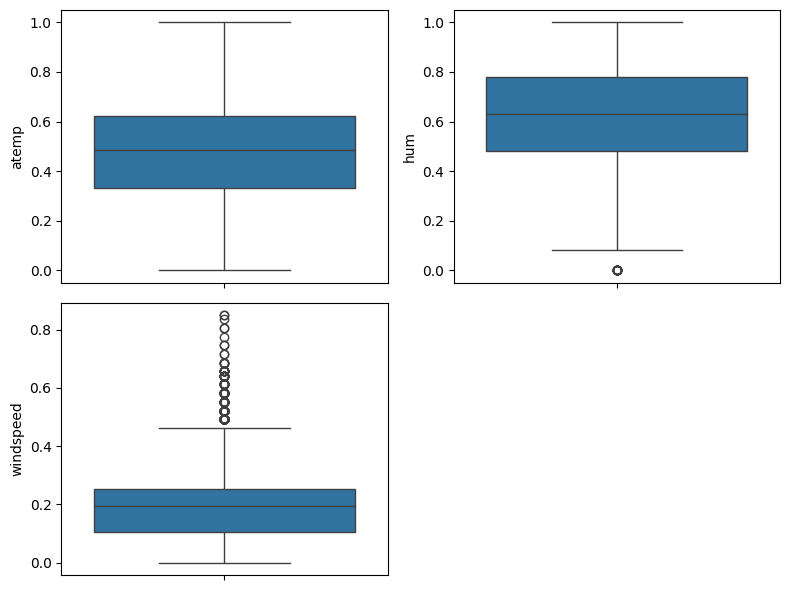

In [23]:
# Visualizing outliers Numerical
plt.figure(figsize=(8,6))

for i,col in enumerate(num_features):
    plt.subplot(2,2,i + 1)
    sns.boxplot(y=col, data= X_num)
    #plt.ylabel('')

plt.tight_layout()

plt.show()

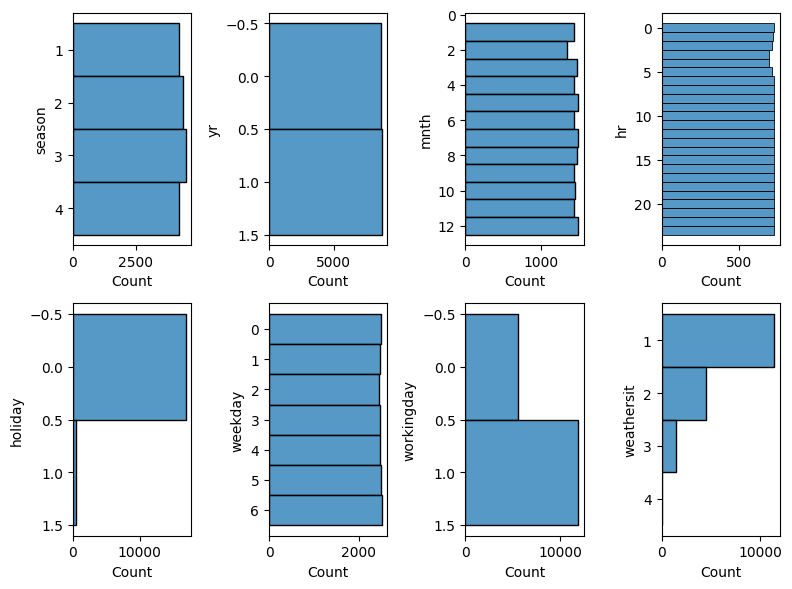

In [24]:
# Visualizing outliers in histplot
plt.figure(figsize=(8,6))

for i,col in enumerate(cat_features):
    plt.subplot(2,4,i + 1)
    sns.histplot(y=col, data= X_cat)
    #plt.ylabel('')

plt.tight_layout()

plt.show()

In [25]:
# function to highlight each outlier
def IQR_Outliers (X, features):

    print('# of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Number of samples: ', len(indices))

    out_indexlist = []

    for col in features:

        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)

        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)

        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)

        out_indexlist.extend(outliers_index)

    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    print('List of rows with outliers: ', out_indexlist)


In [26]:
# numerical features outliers
IQR_Outliers(X_num, num_features)

# of features:  3
Features:  ['atemp', 'hum', 'windspeed']
Number of samples:  17379

Feature:  atemp
Upper and Lower limits:  1.0530499999999998 -0.09854999999999997
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  hum
Upper and Lower limits:  1.23 0.029999999999999916
Number of outliers:  22
Outliers Index:  [1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573]
Outliers:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Feature:  windspeed
Upper and Lower limits:  0.4775 -0.1193
Number of outliers:  342
Outliers Index:  [176, 179, 195, 197, 266, 272, 468, 469, 470, 729, 730, 731, 732, 737, 862, 863, 864, 866, 870, 871, 963, 1007, 1008, 1010, 1011, 1012, 1014, 1015, 1016, 1018, 1019, 1020, 1106, 1108, 1111, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1131, 1132, 1133, 1137, 1138, 1139, 1259, 1260, 1262, 1263, 1265, 1324, 1333, 1334, 1380, 1381, 13

In [79]:
def CustomSampler_IQR (X):

    features = X.columns
    df = X.copy()

    indices = [x for x in df.index]
    out_indexlist = []

    for col in features:

        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)

        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off

        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values
        out_indexlist.extend(outliers_index)

    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))

    clean_data = np.setdiff1d(indices,out_indexlist)

    return clean_data

In [92]:
df_outlier_index = CustomSampler_IQR(df[['atemp', 'hum', 'windspeed']])
df_outlier_removed = df.loc[df_outlier_index].copy()
df_outlier_removed= df_outlier_removed.reset_index(drop= True)
print(df_outlier_removed.shape,df.shape)

(17016, 15) (17379, 15)


In [93]:
df_outlier_removed.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [94]:
print(df_outlier_removed.columns)
X_num = df_outlier_removed[['atemp', 'hum', 'windspeed']].copy()
X_cat = df_outlier_removed[['holiday', 'workingday']].copy()
y_prep = df_outlier_removed[['cnt']].copy()

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [95]:
print([x.shape for x in [X_num, X_cat, y_prep]])

[(17016, 3), (17016, 2), (17016, 1)]


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [135]:
# YOUR CODE HERE
# NOt Required

#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [96]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder(sparse_output=False)
X_one_hot_enc = one_hot_enc.fit_transform(df_outlier_removed[['weathersit']])

# create dataframe from the encoded values
X_one_hot_df = pd.DataFrame(
    X_one_hot_enc, columns=one_hot_enc.get_feature_names_out(['weathersit'])
)

In [97]:
X_one_hot_df.shape

(17016, 4)

In [98]:
print(X_one_hot_df.shape,df.shape)

(17016, 4) (17379, 15)


#### Specify features and targets after applying scaling and one-hot encoding

In [99]:
len(X_cat['holiday'].unique())

2

In [100]:
def CustomSinCosEncoder (X):

    features = X.columns
    df = X.copy().astype('int64')
    X_trans = pd.DataFrame()


    for col in features:
        max_val = len(df[col].unique())
        X_trans[col + '_sin'] = np.sin(2 * np.pi * df[col] /max_val)
        X_trans[col + '_cos'] = np.cos(2 * np.pi * df[col] /max_val)
    return X_trans

In [101]:
X_sin_cos = CustomSinCosEncoder(df_outlier_removed[['season','mnth','weekday','hr']])
X_sin_cos.shape

(17016, 8)

In [102]:
print(X_sin_cos.shape,df.shape)

(17016, 8) (17379, 15)


### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [104]:
X_prep = pd.concat([X_num, X_cat, X_one_hot_df, X_sin_cos], axis =1)
print(X_prep.shape,y_prep.shape)

(17016, 17) (17016, 1)


In [105]:
X_prep.columns

Index(['atemp', 'hum', 'windspeed', 'holiday', 'workingday', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'season_sin',
       'season_cos', 'mnth_sin', 'mnth_cos', 'weekday_sin', 'weekday_cos',
       'hr_sin', 'hr_cos'],
      dtype='object')

In [44]:
rej_features = ['dteday','yr']
tgt_features = ['casual','registered','cnt']
num_features = ['atemp','hum','windspeed']
cat_features = ['holiday','workingday','weathersit']
periodic_features = ['season', 'mnth', 'hr', 'weekday']

In [ ]:
hour.drop(columns= tgt_features+rej_features, axis= 1).columns.tolist()

In [ ]:
y = hour[tgt_features[2]].copy()

X = hour.drop(columns= tgt_features+rej_features, axis= 1).copy()

print(len(y),len(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= 42,
                                                    stratify= X['holiday'],
                                                    shuffle= True)

In [109]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_prep, y_prep,
                                                    test_size= 0.2,
                                                    random_state= 42,
                                                    #stratify= X_prep['holiday'],
                                                    shuffle= True)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [339]:
from scipy.linalg import lstsq

lstsq_theta, lstsq_residuals, lstsq_rank, lstsq_s = lstsq(X_train, y_train)
print("Coefficients for Least squares (theta): \n", lstsq_theta)
# Performing predictions
pred = np.dot(X_test,lstsq_theta)
print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(y_test, pred)))
print('R-squared: \n',r2_score(y_test, pred))

Coefficients for Least squares (theta): 
 [[-5.70113385e+14]
 [ 2.28437500e+02]
 [-6.12549039e+01]
 [-1.01725821e+01]
 [-2.01687538e+01]
 [ 4.28867047e+00]
 [ 5.70113385e+14]
 [ 5.70113385e+14]
 [ 5.70113385e+14]
 [ 5.70113385e+14]
 [-9.06899352e+00]
 [ 4.38585072e+00]
 [-1.38064006e+01]
 [-4.58858202e+00]
 [-4.68806021e+00]
 [-3.06482853e+00]
 [-9.01997219e+01]
 [-9.51003418e+01]]
Root Mean Squared Error: 
 137.26216181407366
R-squared: 
 0.43890382148531415


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
eta =[0.001, 0.003, 0.01, 0.03, 0.1, 0.3]

In [112]:
# Step1: Define cost function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [266]:
# Define Batch Gradient Algorithm
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = np.dot(X,B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = np.dot(X.T, loss) / m
        # Changing Values of B using Gradient
        delta_B = alpha * gradient
        B = B - delta_B
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

In [267]:
# Split train test
print(list(map(lambda x: x, enumerate(X_prep.columns))))
X_BGD_prep = np.c_[np.ones((X_prep.shape[0]),dtype='int64'),X_prep]
y_BGD_prep = y_prep
print(X_BGD_prep.shape)

[(0, 'atemp'), (1, 'hum'), (2, 'windspeed'), (3, 'holiday'), (4, 'workingday'), (5, 'weathersit_1'), (6, 'weathersit_2'), (7, 'weathersit_3'), (8, 'weathersit_4'), (9, 'season_sin'), (10, 'season_cos'), (11, 'mnth_sin'), (12, 'mnth_cos'), (13, 'weekday_sin'), (14, 'weekday_cos'), (15, 'hr_sin'), (16, 'hr_cos')]
(17016, 18)


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X_BGD_prep, y_BGD_prep,
                                                    test_size= 0.2,
                                                    random_state= 42,
                                                    stratify= X_BGD_prep[:,4],
                                                    shuffle= True)

Learning rate: 0.001
Root Mean Squared Error: 
 145.28331523139803
R-squared: 
 0.37141049640766344
--------------------
Learning rate: 0.003
Root Mean Squared Error: 
 138.54302819483817
R-squared: 
 0.42838318771412487
--------------------
Learning rate: 0.01
Root Mean Squared Error: 
 137.76513880873858
R-squared: 
 0.4347841786080907
--------------------
Learning rate: 0.03
Root Mean Squared Error: 
 137.38987012536597
R-squared: 
 0.43785925131318226
--------------------
Learning rate: 0.1
Root Mean Squared Error: 
 137.2176596602881
R-squared: 
 0.4392675916649399
--------------------
Learning rate: 0.3
Root Mean Squared Error: 
 137.26633687985773
R-squared: 
 0.43886968754697553
--------------------


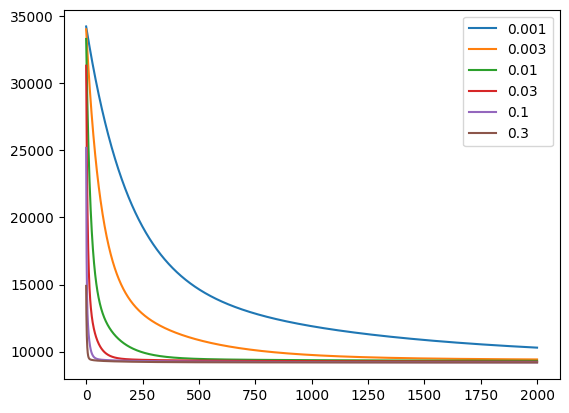

In [278]:
# For plotting
plt.figure()

# Initial Coefficients
R = X_train.shape[1]
B = np.zeros(R).reshape(R,1)
eta = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
iter_ = 2000
for i,eta_i in enumerate(eta):
    newB, cost_history[i] = batch_gradient_descent(
        X_train, y_train, B, eta_i, iter_)
    pred = np.dot(X_test,newB)
    print(f'Learning rate: {eta_i}')
    print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(y_test, pred)))
    print('R-squared: \n',r2_score(y_test, pred))
    print('-'*20)
    plt.plot(cost_history[i])

plt.legend(eta)
plt.show()

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [280]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(max_iter= 1000,
                          tol= 1e-3,
                          )
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [282]:
pred = regressor.predict(X_test)
print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(y_test, pred)))
print('R-squared: \n',r2_score(y_test, pred))

Root Mean Squared Error: 
 137.33901621095853
R-squared: 
 0.4382753193514056


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [293]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()

Lin_reg.fit(X_train,y_train)

LinearRegression()

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [294]:
pred = Lin_reg.predict(X_test)
print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(y_test, pred)))
print('R-squared: \n',r2_score(y_test, pred))

Root Mean Squared Error: 
 137.27988168230152
R-squared: 
 0.4387589426347682


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [317]:
features = list(X_prep.columns)
features.insert(0,'bias')
print(features)

['bias', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'season_sin', 'season_cos', 'mnth_sin', 'mnth_cos', 'weekday_sin', 'weekday_cos', 'hr_sin', 'hr_cos']


[  0.         228.42375162 -59.93989803  -8.54433546 -19.58384272
   4.41182075  26.57693359  16.12250533 -39.55211076  -3.14732817
  -9.07974784   4.40266546 -13.75016954  -4.59729018  -4.78213941
  -2.93745105 -90.3120576  -95.28756825]


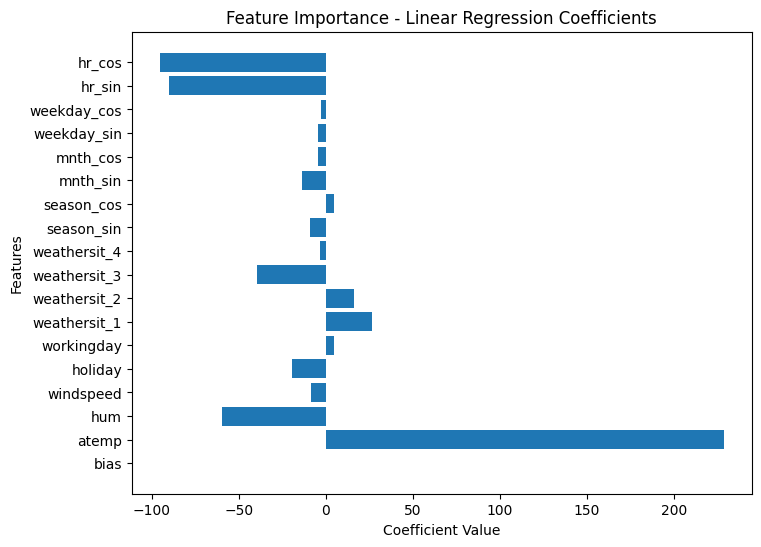

In [338]:
coefficients = Lin_reg.coef_
print(coefficients[0,:])
plt.figure(figsize=(8, 6))
plt.barh(features,coefficients[0,:])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance - Linear Regression Coefficients")
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [288]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [289]:
from sklearn.linear_model import Lasso

for i in alpha:
    Lasso_reg = Lasso(alpha=i).fit(X_train, y_train)
    pred = Lasso_reg.predict(X_test)
    print('Lasso(alpha)= \n',i)
    print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(y_test, pred)))
    print('R-squared: \n',r2_score(y_test, pred))
    print('-'*20)

Lasso(alpha)= 
 0.0001
Root Mean Squared Error: 
 137.28008594130884
R-squared: 
 0.43875727249016827
--------------------
Lasso(alpha)= 
 0.001
Root Mean Squared Error: 
 137.28018593978337
R-squared: 
 0.43875645484153925
--------------------
Lasso(alpha)= 
 0.01
Root Mean Squared Error: 
 137.28193853474107
R-squared: 
 0.4387421244575971
--------------------
Lasso(alpha)= 
 0.1
Root Mean Squared Error: 
 137.27334904580945
R-squared: 
 0.4388123560924796
--------------------
Lasso(alpha)= 
 1
Root Mean Squared Error: 
 137.59593630789612
R-squared: 
 0.43617171687096123
--------------------
Lasso(alpha)= 
 10
Root Mean Squared Error: 
 143.60795920375125
R-squared: 
 0.3858242528430369
--------------------
Lasso(alpha)= 
 100
Root Mean Squared Error: 
 183.2710624732783
R-squared: 
 -0.00028426443098084064
--------------------


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [290]:
from sklearn.linear_model import Ridge

for i in alpha:
    Ridge_reg = Ridge(alpha=i).fit(X_train, y_train)
    pred = Ridge_reg.predict(X_test)
    print('Ridge(alpha)= \n',i)
    print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(y_test, pred)))
    print('R-squared: \n',r2_score(y_test, pred))
    print('-'*20)

Ridge(alpha)= 
 0.0001
Root Mean Squared Error: 
 137.27988118204095
R-squared: 
 0.43875894672519655
--------------------
Ridge(alpha)= 
 0.001
Root Mean Squared Error: 
 137.27987667958865
R-squared: 
 0.4387589835399289
--------------------
Ridge(alpha)= 
 0.01
Root Mean Squared Error: 
 137.2798316446437
R-squared: 
 0.43875935177240033
--------------------
Ridge(alpha)= 
 0.1
Root Mean Squared Error: 
 137.27938044754353
R-squared: 
 0.43876304102134245
--------------------
Ridge(alpha)= 
 1
Root Mean Squared Error: 
 137.2748960266576
R-squared: 
 0.4387997075859038
--------------------
Ridge(alpha)= 
 10
Root Mean Squared Error: 
 137.24389696572
R-squared: 
 0.43905313655695954
--------------------
Ridge(alpha)= 
 100
Root Mean Squared Error: 
 137.3769660958924
R-squared: 
 0.4379648419237657
--------------------


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [292]:
from sklearn.linear_model import ElasticNet

for i in alpha:
    ElNet_reg = ElasticNet(alpha=i).fit(X_train, y_train)
    pred = ElNet_reg.predict(X_test)
    print('ElNet(alpha)= \n',i)
    print('Root Mean Squared Error: \n',np.sqrt(mean_squared_error(y_test, pred)))
    print('R-squared: \n',r2_score(y_test, pred))
    print('-'*20)

ElNet(alpha)= 
 0.0001
Root Mean Squared Error: 
 137.27649563560246
R-squared: 
 0.4387866286288057
--------------------
ElNet(alpha)= 
 0.001
Root Mean Squared Error: 
 137.25207070277077
R-squared: 
 0.43898631874143057
--------------------
ElNet(alpha)= 
 0.01
Root Mean Squared Error: 
 137.30498607258835
R-squared: 
 0.4385536554118882
--------------------
ElNet(alpha)= 
 0.1
Root Mean Squared Error: 
 138.45541493768786
R-squared: 
 0.4291059288868049
--------------------
ElNet(alpha)= 
 1
Root Mean Squared Error: 
 150.7515642694032
R-squared: 
 0.32320164208863555
--------------------
ElNet(alpha)= 
 10
Root Mean Squared Error: 
 176.656413250651
R-squared: 
 0.07061756819141629
--------------------
ElNet(alpha)= 
 100
Root Mean Squared Error: 
 183.2371304738092
R-squared: 
 8.609958156868824e-05
--------------------


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?


Regression experiments:

|Sl. No.|Regresser name|Changed variable| metrics|Remarks|
|---|---|---|---|---|
|1.|Normal Equation coefficients|stratify='holiday'|$$RMSE= 150.69 \\ R{^2}= 0.3368$$| Since the holiday column has Unbalanced distribution|
|2.|Normal Equation coefficients|None|$$RMSE= 143.91 \\ R{^2}= 0.3459$$| For comparison|
|3.|Normal Equation Coefficients|With prepared data: <p> Outlier removed, Stratify= 'holiday', OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$RMSE= 137.27 \\ R{^2}= 0.4387$$| Check influence of encoding|
|4.|Normal Equation Coefficients|With prepared data: <p> Outlier removed, OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$RMSE= 137.69 \\ R{^2}= 0.4446$$| For comparison|
|5.|Batch Gradient Descent Coefficients|With prepared data: <p> Outlier removed, Stratify= 'holiday', OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$\text{Learning rate: }0.01 \\ RMSE= 137.76 \\ R{^2}= 0.4347$$| For comparison|
|6.|Stochastic Gradient Descent Coefficients|With prepared data: <p> Outlier removed, Stratify= 'holiday', OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$ RMSE= 137.33 \\ R{^2}= 0.4382$$| For comparison|
|7.|LinearRegression()|With prepared data: <p> Outlier removed, Stratify= 'holiday', OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$ RMSE= 137.27 \\ R{^2}= 0.4387$$| For comparison|
|8.|Lasso()|With prepared data: <p> Outlier removed, Stratify= 'holiday', OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$\text{alpha= }0.1 \\ RMSE= 137.27 \\ R{^2}= 0.4388$$| For comparison|
|9.|Ridge()|With prepared data: <p> Outlier removed, Stratify= 'holiday', OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$\text{alpha= }10 \\ RMSE= 137.24 \\ R{^2}= 0.4391$$| For comparison|
|10.|ElasticNet()|With prepared data: <p> Outlier removed, Stratify= 'holiday', OneHotEncoder= 'weathersit', Sin_cos_encoder= 'season', 'mnth', 'weekday', 'hr' </p>|$$\text{alpha= }0.001 \\ RMSE= 137.25 \\ R{^2}= 0.4389$$| For comparison|